# #codelikeabosch2023  
  
This notebook contains our solution for the software challenge of the hackathon.
  
## Team members
* Bálint Dániel
* Kecskés Bence
* Dr. Varga-Umbrich Károly
* Dobosi Péter

In [1]:
!pip3 install -r requirements.txt 

In [3]:
import time
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Dataset Preprocessing  
  
First we import the data, normalize it, then we take an exploratory glance at it.

In [4]:
data = pd.read_csv('data/DevelopmentData.csv', sep=';')
data.set_index('Unnamed: 0', inplace=True)
data.index.rename('ind', inplace=True)
data

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
0,8211,1444,5455,-1153,3103,-1237,12024,1715,0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,8208,1443,5455,-1153,3102,-1237,0,0,0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,8211,1444,5453,-1160,3104,-1232,0,0,0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,8209,1445,5452,-1166,3104,-1232,0,0,0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,8209,1445,5452,-1167,3106,-1225,0,0,0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,782,-589,9912,-2071,0,0,1145,-733,0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,825,-619,9911,-2065,0,0,1144,-733,0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,820,-631,9906,-2060,0,0,1146,-730,0,674,-153,10,31,0,0,18,-5,-0.001343,72.972854


Normalizing the data based on the information from the presentation:

In [5]:
data_normed = data.copy()

data_normed[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] = \
data[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] / 128

data_normed[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] = \
data[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] / 256

data_normed

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,72.972854


We've figured that learning about the ego vehicle's movements couldn't hurt:

<Axes: xlabel='ind'>

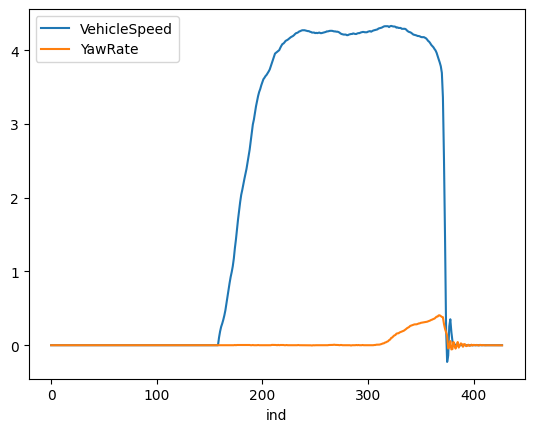

In [19]:
# select only the data describing the ego vehicle
vehicle_data = data_normed[["VehicleSpeed", "YawRate", "Timestamp"]]
vehicle_data[["VehicleSpeed", "YawRate"]].plot()

The changes of the YawRate during the observed time period suggested that the ego vehicle takes a turn.  
It can be described with three phases:
1. Moving straight
2. Taking a turn
3. Moving straight  
    
Similarly, the changes in the vehicle's speed suggest that the vehicle's movement can be split into four phases:
1. Stationary
2. Acceleration
3. Maintaing momentum
4. Emergency Braking
    * It is interesting to note, that at the end of this period the vehicle's speed appeared to be negative. We weren't able to figure out why this could be, however this definetly seemed like an anomaly.

We've also checked that the difference between the timesteps are roughly the same. It appears to be about ~0.9 seconds. Furthermore, the data spans ~40 seconds.

In [20]:
# Calculate the timedeltas between the timestamps
vehicle_data['DeltaTime'] = vehicle_data['Timestamp'].diff().fillna(0)
vehicle_data

/tmp/ipykernel_7756/990100802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data['DeltaTime'] = vehicle_data['Timestamp'].diff().fillna(0)


,VehicleSpeed,YawRate,Timestamp,DeltaTime
ind,,,,
0,0.0,0.000000,33.241504,0.000000
1,0.0,0.000000,33.335960,0.094456
2,0.0,0.000000,33.429725,0.093766
3,0.0,0.000000,33.522769,0.093044
4,0.0,0.000000,33.618715,0.095946
...,...,...,...,...
423,0.0,-0.001343,72.804477,0.082599
424,0.0,-0.001343,72.889443,0.084966
425,0.0,-0.001343,72.972854,0.083411


In [21]:
vehicle_data.DeltaTime.mean()

0.09322915857476635

Based on this information, we were able to calculate the vehicle's position for each timestep, in relation to it's starting position in the first timestep. We've delegated that position as (0,0), and we refer to the value's calculated in relation to this (0,0) position as absolute positions.  
The reasoning behind this was that understanding the objects' movements, and visualizing them, might be easier this way.
  
Furthermore, once we knew the absolute position of the vehicle in each timestep, we were able to calulate the same for the four objects, using their relative distances from the vehicle.

In [27]:
def calculate_vehicle_coordinates(vehicle_data: pd.DataFrame) -> Tuple[list, list]:
    """
    Given a dataframe containing the vehicle's speed, yaw rate and the timedelta, for each timestep, return a list of the vehicle's x and y coordinates.
    https://en.wikipedia.org/wiki/Dead_reckoning

    :param vehicle_data: The dataframe containing the information about the vehicle.

    :return: A tuple containing two lists, for the x and y coordinates of the vehicle in each timestep.
    """
    # Initializes the starting state
    x, y, heading = 0, 0, 0
    computed_x_coordinates = [x]
    computed_y_coordinates = [y]
    # Iterate through the timesteps
    for _, row in vehicle_data.iterrows():
        # Calculate the parameters required to get the coordinates
        delta_time = row["DeltaTime"]
        distance_traveled = row["VehicleSpeed"] * delta_time
        delta_yaw = row["YawRate"] * delta_time
        # Update x and y with using these parameters
        x += distance_traveled * np.cos(heading)
        y += distance_traveled * np.sin(heading)
        
        heading += delta_yaw
        computed_x_coordinates.append(x)
        computed_y_coordinates.append(y)
    return (computed_x_coordinates, computed_y_coordinates)
        

def get_object_absolute_coordinates(vehicle_data: pd.DataFrame, object_data: pd.DataFrame) -> pd.DataFrame:
    """
    Given a dataframe of our vehicle's movements, and a dataframe of the object, return a dataframe of the object's absolute position for each timestep.

    :param vehicle_data: The dataframe containing the vehicle's data.
    :param object_data: The dataframe containing the object's data.

    :return: A dataframe containing the object's absolute data.
    """
    merged = vehicle_data[["x", "y", "Timestamp", "VehicleSpeed", "YawRate"]].merge(object_data[["relative_distance_x", "relative_distance_y", "Timestamp"]], on="Timestamp")
    merged["absolute_distance_x"] = merged["x"] + merged["relative_distance_x"]
    merged["absolute_distance_y"] = merged["y"] + merged["relative_distance_y"]
    # merged.drop(["relative_distance_x", "relative_distance_y", "x", "y"], inplace=True, axis="columns")
    return merged

In [24]:
computed_x_coordinates, computed_y_coordinates = calculate_vehicle_coordinates(vehicle_data)
del computed_x_coordinates[0]
del computed_y_coordinates[0]

vehicle_data["x"] = computed_x_coordinates
vehicle_data["y"] = computed_y_coordinates

/tmp/ipykernel_7756/758505515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data["x"] = computed_x_coordinates
/tmp/ipykernel_7756/758505515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data["y"] = computed_y_coordinates


Using the calculated coordinates of the ego vehicle, we were able to visualize the route it travelled. This confirmed our suspicion, that the vehicle took a turn, then came to an abrupt stop.  
Thus the data is describing a **CPLA** scenario.

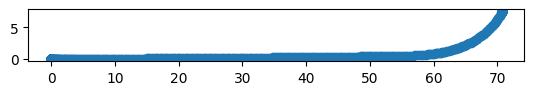

In [25]:
# This is the route the ego vehicle takes in this scenario
plt.scatter(computed_x_coordinates, computed_y_coordinates)
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()

We are not sure why did we decide to calculate the absolute coordinates of the four objects separately, but we did:

In [26]:
# I get the absolute coordinates for each object separately
object0 = data_normed[["FirstObjectDistance_X", "FirstObjectDistance_Y", "FirstObjectSpeed_X", "FirstObjectSpeed_Y", "Timestamp"]]
object0.rename(columns={"FirstObjectDistance_X": "relative_distance_x", "FirstObjectDistance_Y": "relative_distance_y"}, inplace=True)
object1 = data_normed[["SecondObjectDistance_X", "SecondObjectDistance_Y", "SecondObjectSpeed_X", "SecondObjectSpeed_Y", "Timestamp"]]
object1.rename(columns={"SecondObjectDistance_X": "relative_distance_x", "SecondObjectDistance_Y": "relative_distance_y"}, inplace=True)
object2 = data_normed[["ThirdObjectDistance_X", "ThirdObjectDistance_Y", "ThirdObjectSpeed_X", "ThirdObjectSpeed_Y", "Timestamp"]]
object2.rename(columns={"ThirdObjectDistance_X": "relative_distance_x", "ThirdObjectDistance_Y": "relative_distance_y"}, inplace=True)
object3 = data_normed[["FourthObjectDistance_X", "FourthObjectDistance_Y", "FourthObjectSpeed_X", "FourthObjectSpeed_Y", "Timestamp"]]
object3.rename(columns={"FourthObjectDistance_X": "relative_distance_x", "FourthObjectDistance_Y": "relative_distance_y"}, inplace=True)

/tmp/ipykernel_7756/1544727993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object0.rename(columns={"FirstObjectDistance_X": "relative_distance_x", "FirstObjectDistance_Y": "relative_distance_y"}, inplace=True)
/tmp/ipykernel_7756/1544727993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object1.rename(columns={"SecondObjectDistance_X": "relative_distance_x", "SecondObjectDistance_Y": "relative_distance_y"}, inplace=True)
/tmp/ipykernel_7756/1544727993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [29]:
object0_absolute = get_object_absolute_coordinates(vehicle_data, object0)
object1_absolute = get_object_absolute_coordinates(vehicle_data, object1)
object2_absolute = get_object_absolute_coordinates(vehicle_data, object2)
object3_absolute = get_object_absolute_coordinates(vehicle_data, object3)

object0_absolute["object_number"] = 1
object1_absolute["object_number"] = 2
object2_absolute["object_number"] = 3
object3_absolute["object_number"] = 4

After some exploration, we've merged them back together:

In [30]:
merged_absolute_df = pd.concat([object0_absolute, object1_absolute, object2_absolute, object3_absolute], ignore_index=True)
merged_absolute_df

,x,y,Timestamp,VehicleSpeed,YawRate,relative_distance_x,relative_distance_y,absolute_distance_x,absolute_distance_y,object_number
0,0.000000,0.000000,33.241504,0.0,0.000000,64.148438,11.281250,64.148438,11.281250,1
1,0.000000,0.000000,33.335960,0.0,0.000000,64.125000,11.273438,64.125000,11.273438,1
2,0.000000,0.000000,33.429725,0.0,0.000000,64.148438,11.281250,64.148438,11.281250,1
3,0.000000,0.000000,33.522769,0.0,0.000000,64.132812,11.289062,64.132812,11.289062,1
4,0.000000,0.000000,33.618715,0.0,0.000000,64.132812,11.289062,64.132812,11.289062,1
...,...,...,...,...,...,...,...,...,...,...
1707,70.732169,7.454067,72.804477,0.0,-0.001343,8.945312,-5.726562,79.677481,1.727505,4
1708,70.732169,7.454067,72.889443,0.0,-0.001343,8.937500,-5.726562,79.669669,1.727505,4
1709,70.732169,7.454067,72.972854,0.0,-0.001343,8.953125,-5.703125,79.685294,1.750942,4
1710,70.732169,7.454067,73.057103,0.0,-0.001343,8.945312,-5.703125,79.677481,1.750942,4


# Remove objects too far away

In [37]:
merged_absolute_df["is_too_far"] = (merged_absolute_df["relative_distance_x"]**2 + merged_absolute_df["relative_distance_y"]**2) > 100**2
merged_absolute_df

,x,y,Timestamp,VehicleSpeed,YawRate,relative_distance_x,relative_distance_y,absolute_distance_x,absolute_distance_y,object_number,is_too_far
0,0.000000,0.000000,33.241504,0.0,0.000000,64.148438,11.281250,64.148438,11.281250,1,False
1,0.000000,0.000000,33.335960,0.0,0.000000,64.125000,11.273438,64.125000,11.273438,1,False
2,0.000000,0.000000,33.429725,0.0,0.000000,64.148438,11.281250,64.148438,11.281250,1,False
3,0.000000,0.000000,33.522769,0.0,0.000000,64.132812,11.289062,64.132812,11.289062,1,False
4,0.000000,0.000000,33.618715,0.0,0.000000,64.132812,11.289062,64.132812,11.289062,1,False
...,...,...,...,...,...,...,...,...,...,...,...
1707,70.732169,7.454067,72.804477,0.0,-0.001343,8.945312,-5.726562,79.677481,1.727505,4,False
1708,70.732169,7.454067,72.889443,0.0,-0.001343,8.937500,-5.726562,79.669669,1.727505,4,False
1709,70.732169,7.454067,72.972854,0.0,-0.001343,8.953125,-5.703125,79.685294,1.750942,4,False
1710,70.732169,7.454067,73.057103,0.0,-0.001343,8.945312,-5.703125,79.677481,1.750942,4,False


# Visualization

In [38]:
# for name, group in merged_absolute_df.groupby('Timestamp'):
#     print(f'Category: {name}', len(group))



# # Most egy időponthoz van az objektum korrdinátája. lehet nincs 4 mert túl messze volt aban az időben

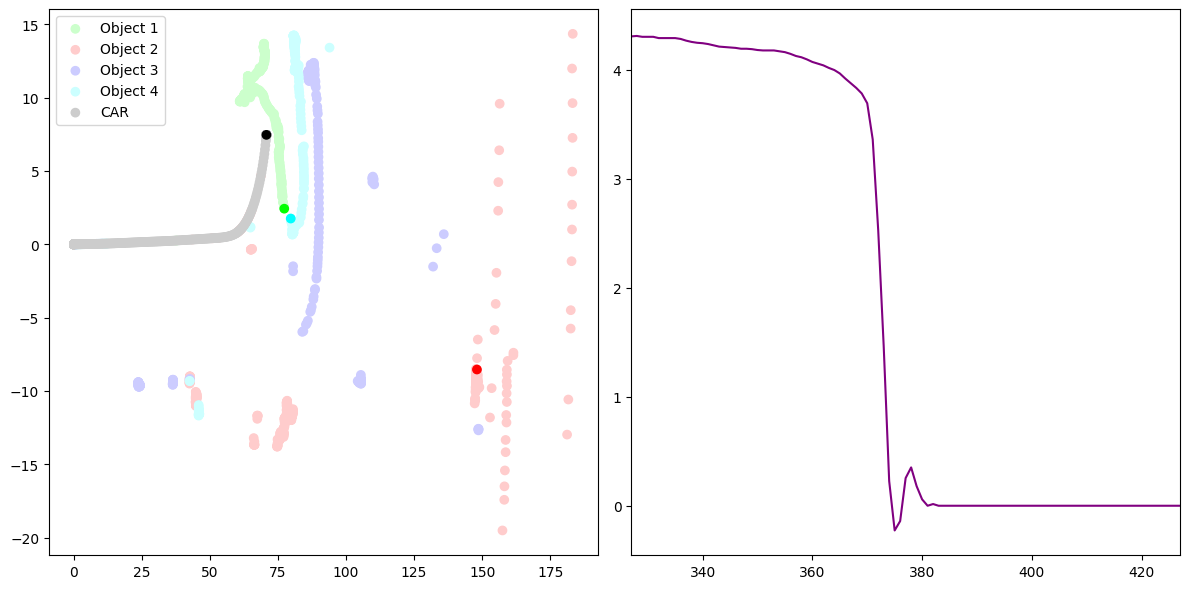

In [29]:
# import matplotlib.pyplot as plt
# from IPython.display import clear_output
# import numpy as np
# import random
# import time

# # Inicializáld az objektumokat és egyéb változókat itt

# plt.ion()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Két tengely (axis) létrehozása

# # Első tengely: Scatter plot
# ax1.set_xlabel('X Axis')
# ax1.set_ylabel('Y Axis')
# ax1.set_title('Interactive Scatter Plot')

# # Második tengely: Line plot
# ax2.set_xlabel('X Label for Line Plot')
# ax2.set_ylabel('Y Label for Line Plot')
# ax2.set_title('Line Plot')

# line_data = []
# line_x = []

# for i in range(200, len(object0_absolute)):
#     ax1.clear()
#     ax2.clear()

#     # Scatter plot frissítése
#     ax1.scatter(object0_absolute["absolute_FirstObjectDistance_X"][:i], object0_absolute["absolute_FirstObjectDistance_Y"][:i], c=[(0.8, 1, 0.8)] * (i - 1) + [(0, 1, 0)], marker='o')
#     ax1.scatter(object1_absolute["absolute_SecondObjectDistance_X"][:i], object1_absolute["absolute_SecondObjectDistance_Y"][:i], c=[(1, 0.8, 0.8)] * (i - 1) + [(1, 0, 0)], marker='o')
#     ax1.scatter(object2_absolute["absolute_ThirdObjectDistance_X"][:i], object2_absolute["absolute_ThirdObjectDistance_Y"][:i], c=[(0.8, 0.8, 1)] * (i - 1) + [(0, 0, 1)], marker='o')
#     ax1.scatter(object3_absolute["absolute_FourthObjectDistance_X"][:i], object3_absolute["absolute_FourthObjectDistance_Y"][:i], c=[(0.8, 1, 1)] * (i - 1) + [(0, 1, 1)], marker='o')
#     ax1.scatter(computed_x_coordinates[:i], computed_y_coordinates[:i], c=[(0.8, 0.8, 0.8)] * (i - 1) + [(0, 0, 0)])
#     ax1.legend(["Object 1", "Object 2", "Object 3", "Object 4", "Vehicle"])

#     # Line plot frissítése
#     line_data.append(data_normed["VehicleSpeed"][i])
#     line_x.append(i)
#     ax2.plot(line_x, line_data, marker='', linestyle='-', color='black')
#     ax2.legend(["Vehicle speed"])

#     plt.tight_layout()

#     display(fig)
#     clear_output(wait=True)

# plt.ioff()
# plt.show()
